In [1]:
from nltk.corpus import wordnet as wn

In [2]:
panda = wn.synset('panda.n.01')

In [3]:
hyper = lambda s : s.hypernyms()

In [4]:
list(panda.closure(hyper))

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

In [5]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
from sklearn.decomposition import PCA

In [7]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

unable to import 'smart_open.gcs', disabling that module


In [8]:
glove_file = datapath('E:/NLP_stanford/glove.6B/glove.6B.300d.txt')

In [9]:
word2vec_glove_file = get_tmpfile('glove.6B.300d.word2vec.txt')

In [10]:
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 300)

In [20]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [12]:
model.most_similar('banana')

[('bananas', 0.6691170930862427),
 ('mango', 0.580410361289978),
 ('pineapple', 0.5492371916770935),
 ('coconut', 0.5462779402732849),
 ('papaya', 0.541056752204895),
 ('fruit', 0.5218108296394348),
 ('growers', 0.4877638816833496),
 ('nut', 0.4839959144592285),
 ('peanut', 0.48062020540237427),
 ('potato', 0.4806118607521057)]

In [13]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])

In [14]:
print("{} : {:.4f}".format(*result[0]))

queen : 0.6713


In [15]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [16]:
analogy('tall', 'tallest', 'long')

'longest'

In [17]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab]
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:, :2]
    
    plt.figure(figsize=(6, 6))
    plt.scatter(twodim[:,0], twodim[:, 1])
    
    for word , (x, y) in zip(words, twodim):
        plt.text(x + 0.05, y + 0.05, word)

<IPython.core.display.Javascript object>


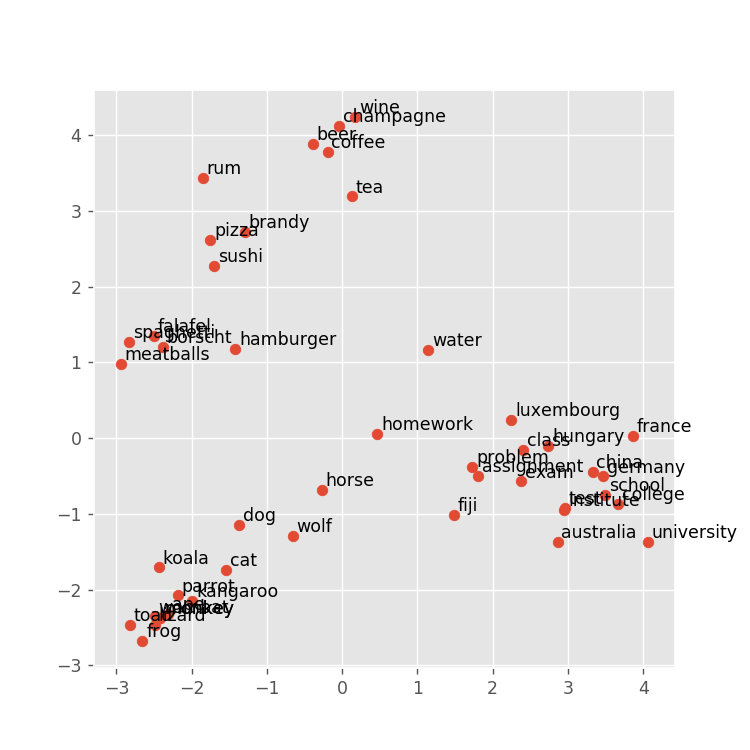

In [18]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


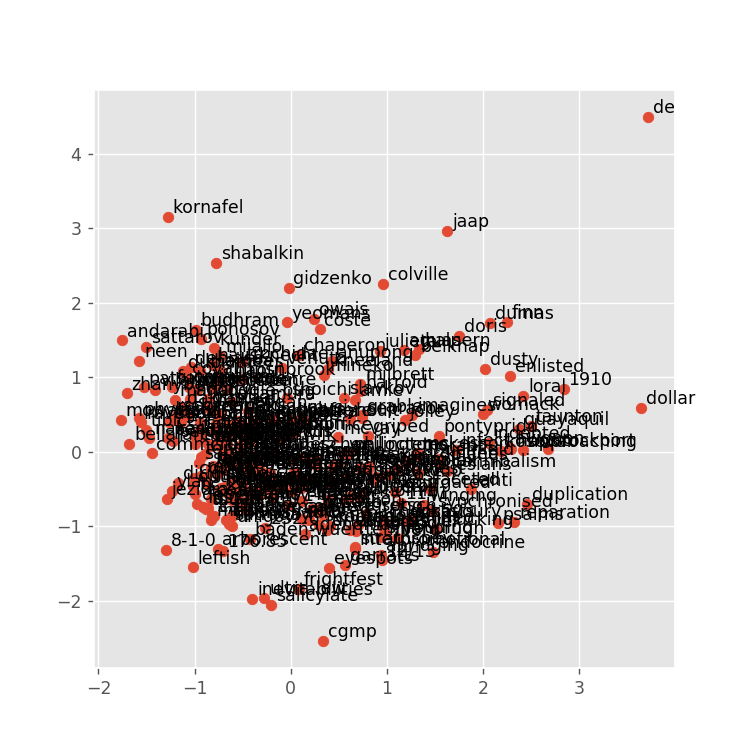

In [21]:
display_pca_scatterplot(model, sample=300)